# Cleaned Day-Trading Training Data
### Day-trading entry positions that show bullish RSI divergence

https://www.kaggle.com/dawerty/cleaned-daytrading-training-data/tasks?taskId=3265

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [52]:
import warnings

warnings.filterwarnings('ignore')

In [124]:
ds = pd.read_csv('train.csv')

In [125]:
columns = ds.columns
columns

Index(['is_profit', 'sym', 'datetime', 'rsi14', 'sma9_var', 'sma180_var',
       'vwap_var', 'spread14_e', 'volume14_34_var', 'prev_close_var',
       'prev_floor_var', 'prev_ceil_var', 'prev1_candle_score',
       'prev2_candle_score', 'prev3_candle_score', 'mins_from_start',
       'valley_interval_mins', 'valley_close_score', 'valley_rsi_score',
       'day_open_var', 'open_from_prev_close_var', 'ceil_var', 'floor_var'],
      dtype='object')

In [126]:
columns_drop = ['datetime', 'sym'] #, 'valley_rsi_score', 'valley_interval_mins',  'volume14_34_var']

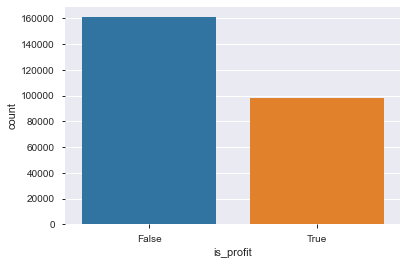

In [127]:
sns.countplot(ds.is_profit);

In [128]:
ds.head(3)

is_profit   sym             datetime      rsi14  sma9_var  sma180_var  \
0       True  MGNX  2020-11-02 11:13:00  30.509761 -0.006223   -0.022679   
1       True  MGNX  2020-11-02 13:55:00  46.452741 -0.001062   -0.004721   
2       True  AEIS  2020-11-02 14:08:00  34.336224 -0.004443   -0.016648   

   vwap_var  spread14_e  volume14_34_var  prev_close_var  ...  \
0 -0.017526    0.000620        -0.006472       -0.037037  ...   
1 -0.007713    0.000695         0.280249       -0.031893  ...   
2 -0.016589    0.000518         0.284800        0.011396  ...   

   prev2_candle_score  prev3_candle_score  mins_from_start  \
0            0.000000            0.000000            103.0   
1            0.001062            0.000504            265.0   
2           -0.001020            0.000000            278.0   

   valley_interval_mins  valley_close_score  valley_rsi_score  day_open_var  \
0                  50.0            0.425532          0.758046     -0.032058   
1                  67.0            0.633584         10.958588     -0.026887   
2                  13.0            0.306356          2.964667     -0.003935   

   open_from_prev_close_var  ceil_var  floor_var  
0                 -0.005144 -0.034554   0.000802  
1                 -0.005144 -0.029397   0.006148  
2                  0.015391 -0.030638   0.000000  

[3 rows x 23 columns]

In [129]:
def plot_hist_boxplot(data, col=columns[3:]):
    plt.figure(figsize=(18, 35))
    for i, feature in enumerate(col):
        plt.subplot(10, 4, i*2+1)
        plt.hist(data[feature], bins=50)
        plt.title(feature)
        plt.subplot(10, 4, i*2+2)
        plt.boxplot(data[feature])
        plt.title(feature)

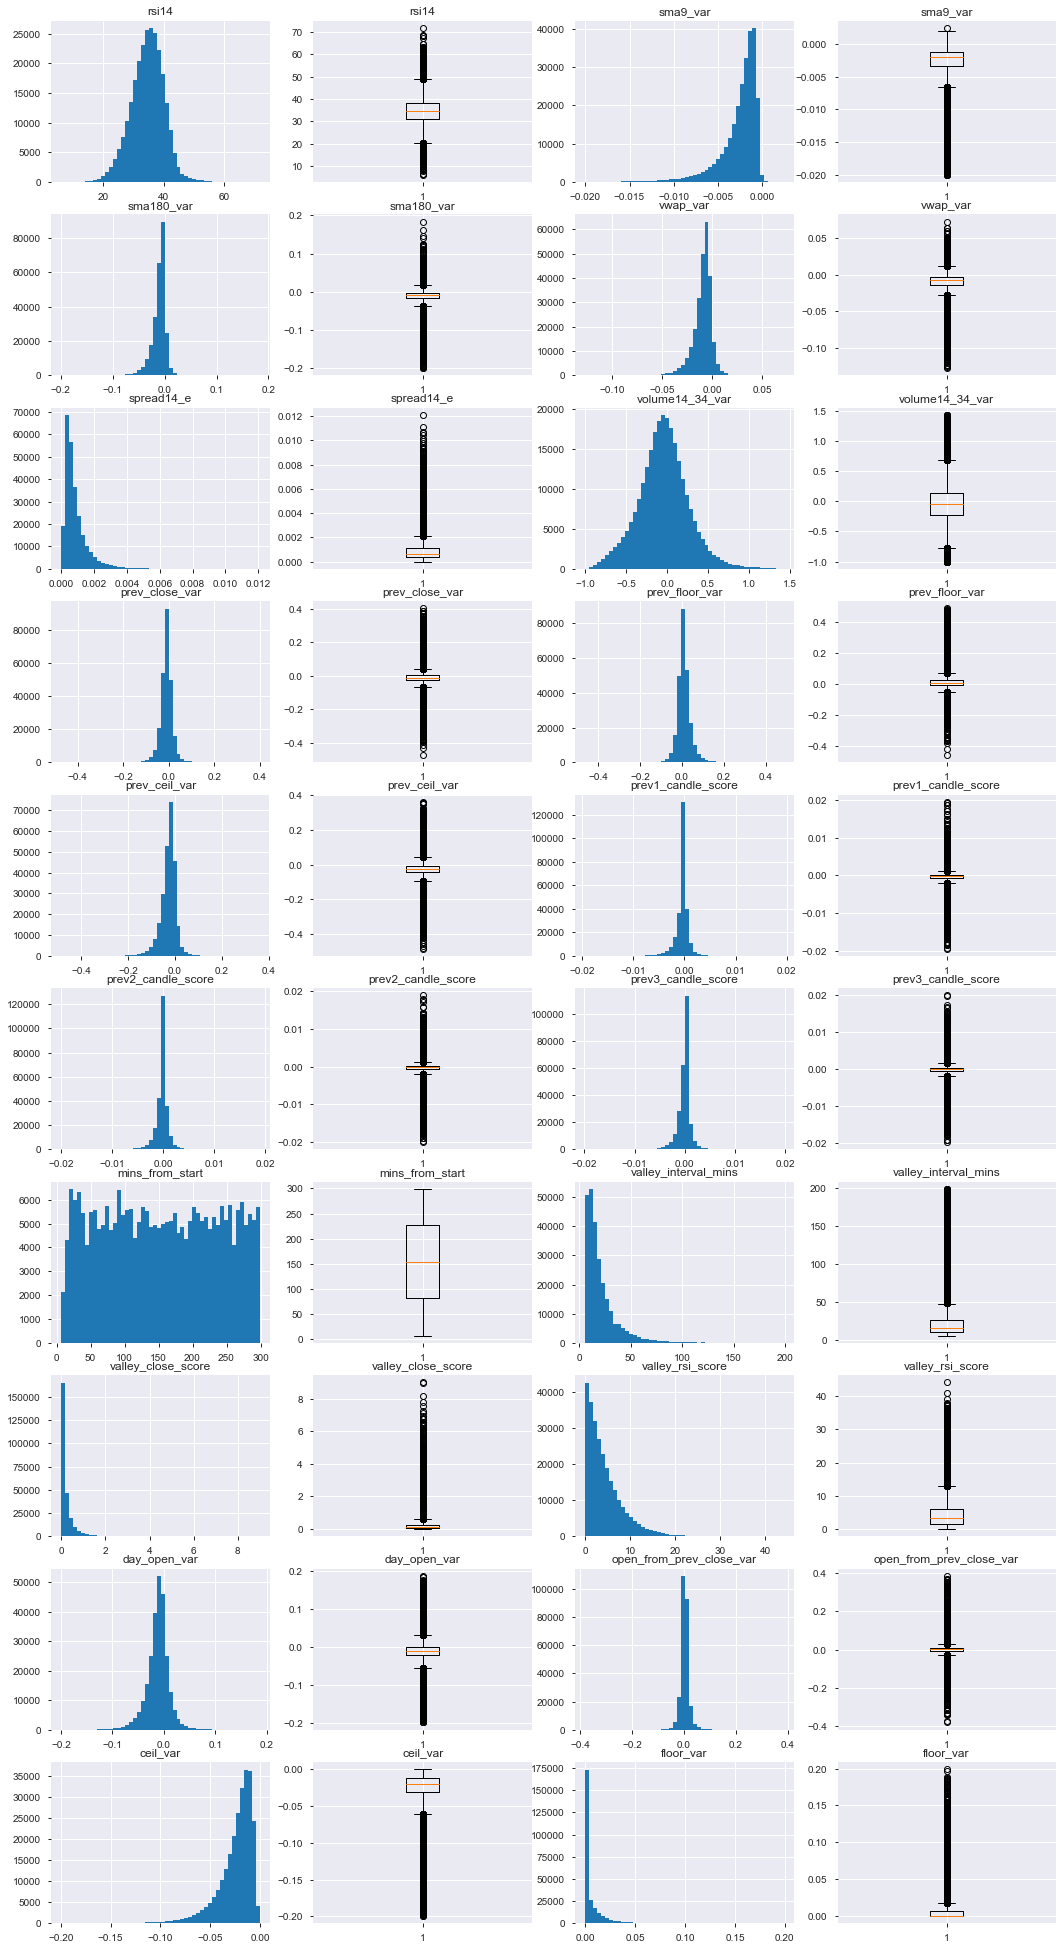

In [130]:
plot_hist_boxplot(data=ds, col=columns[3:])

In [131]:
def drop_outlier(data, treshold=3):
    
    df = data.copy(deep=True)
    
    for col in list(df.columns):
        
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_fence = df[col].quantile(0.25) - IQR * treshold
        upper_fence = df[col].quantile(0.75) + IQR * treshold
        
        index_below_lower = df[col][df[col] < lower_fence].index
        index_above_upper = df[col][df[col] > upper_fence].index
        
        df.drop(index=index_below_lower, inplace=True)
        df.drop(index=index_above_upper, inplace=True)              
        
    return df

### ---------- data for model -----------------       
- drop outlier
- undersampling
- scaler

In [132]:
ds.sort_values(by=['datetime'], inplace=True)

In [133]:
ds.reset_index(drop=True, inplace=True)

In [134]:
ds.drop(columns=columns_drop, axis=1, inplace=True)

In [135]:
ds

is_profit      rsi14  sma9_var  sma180_var  vwap_var  spread14_e  \
0            True  25.864903 -0.005211   -0.017121 -0.006652    0.001381   
1            True  35.941117 -0.013599   -0.040594 -0.013055    0.004202   
2            True  39.219209 -0.004243   -0.011440 -0.005372    0.002192   
3            True  40.864568 -0.002063   -0.014365 -0.003455    0.001831   
4            True  15.371447 -0.006608   -0.053626 -0.016386    0.003477   
...           ...        ...       ...         ...       ...         ...   
258724      False  42.584938 -0.002942   -0.001782 -0.000201    0.000704   
258725      False  39.683352 -0.002649   -0.007363 -0.007414    0.000632   
258726      False  38.506831 -0.000718   -0.000635  0.000872    0.000246   
258727      False  46.916006 -0.000547    0.000627  0.002996    0.000404   
258728      False  39.315644 -0.000641   -0.001787 -0.001375    0.000197   

        volume14_34_var  prev_close_var  prev_floor_var  prev_ceil_var  ...  \
0              0.413605       -0.016173        0.002288      -0.035455  ...   
1             -0.023284       -0.018765       -0.009339      -0.082802  ...   
2              0.257575       -0.011508       -0.000895      -0.051478  ...   
3             -0.378129        0.000136        0.000478      -0.033313  ...   
4              0.320950       -0.044232       -0.044232      -0.111290  ...   
...                 ...             ...             ...            ...  ...   
258724        -0.220472       -0.019825       -0.016401      -0.030969  ...   
258725        -0.217332       -0.007519        0.004912      -0.025248  ...   
258726        -0.025282       -0.001192        0.012749      -0.003005  ...   
258727        -0.172408       -0.001406        0.022147      -0.011332  ...   
258728         0.093292       -0.010970       -0.005345      -0.013951  ...   

        prev2_candle_score  prev3_candle_score  mins_from_start  \
0                 0.000681           -0.000680              8.0   
1                 0.010158            0.001416             11.0   
2                -0.000178            0.001964             11.0   
3                 0.002185           -0.001158             12.0   
4                -0.004381            0.000000             12.0   
...                    ...                 ...              ...   
258724           -0.001847            0.000000            299.0   
258725            0.000000            0.000438            299.0   
258726           -0.000439            0.000533            299.0   
258727           -0.000401            0.000201            299.0   
258728           -0.000197           -0.000296            299.0   

        valley_interval_mins  valley_close_score  valley_rsi_score  \
0                        6.0            0.409278          4.864155   
1                        9.0            0.624558          1.913348   
2                        7.0            0.123792          1.588380   
3                        7.0            0.030710          2.705955   
4                        7.0            0.406680          9.065181   
...                      ...                 ...               ...   
258724                  22.0            0.015440          0.564469   
258725                  12.0            0.024437          2.212095   
258726                  24.0            0.081549          1.384253   
258727                  27.0            0.060287          8.779307   
258728                  14.0            0.004927          1.627241   

        day_open_var  open_from_prev_close_var  ceil_var  floor_var  
0          -0.008040                 -0.008199 -0.008040   0.000000  
1          -0.023154                  0.004493 -0.023154   0.000000  
2          -0.010106                 -0.001416 -0.010808   0.000000  
3          -0.009104                  0.009325 -0.010872   0.000000  
4          -0.027790                 -0.016912 -0.027790   0.000000  
...              ...                       ...       ...        ...  
258724    

In [136]:
ds = drop_outlier(ds)

In [137]:
size_train = int(ds.shape[0] *.70)
size_train

135601

In [138]:
ds_train = ds[:size_train]
ds_test = ds[size_train:]

In [139]:
ds_train.shape[0] + ds_test.shape[0], ds.shape

(193716, (193716, 21))

In [140]:
X_train = ds_train.drop(['is_profit'], axis=1)
y_train = ds_train['is_profit']

X_test = ds_test.drop(['is_profit'], axis=1)
y_test = ds_test['is_profit']

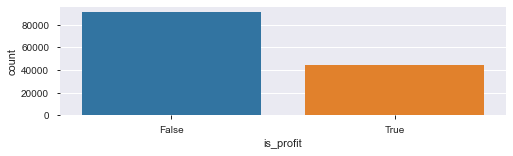

In [141]:
plt.figure(figsize=(8, 2))
sns.countplot(y_train);

In [142]:
y_train.replace([True, False], [1, 0], inplace=True)
y_test.replace([True, False], [1, 0], inplace=True)

In [143]:
amount_index = y_train[y_train == 1].shape[0]

In [144]:
index_true = y_train[y_train == 1].index
index_false = y_train[y_train == 0].index
index_false = np.random.choice(index_false, amount_index)

In [145]:
y_train.shape, y_train[y_train == 1].shape

((135601,), (44218,))

In [146]:
X_train_undersampling = X_train.loc[index_true]
X_train_undersampling = X_train_undersampling.append(X_train.loc[index_false])

y_train_undersampling = y_train[index_true]
y_train_undersampling = y_train_undersampling.append(y_train[index_false])

In [147]:
X_train_undersampling.shape, y_train_undersampling.shape

((88436, 20), (88436,))

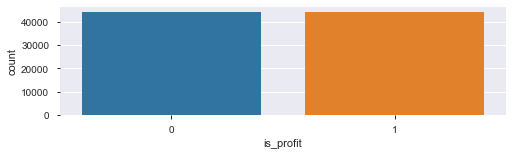

In [148]:
plt.figure(figsize=(8, 2))
sns.countplot(y_train_undersampling);

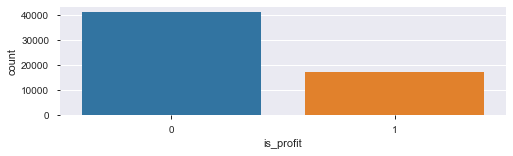

In [149]:
plt.figure(figsize=(8, 2))
sns.countplot(y_test);

In [150]:
columns = list(X_train_undersampling.columns)
columns

['rsi14',
 'sma9_var',
 'sma180_var',
 'vwap_var',
 'spread14_e',
 'volume14_34_var',
 'prev_close_var',
 'prev_floor_var',
 'prev_ceil_var',
 'prev1_candle_score',
 'prev2_candle_score',
 'prev3_candle_score',
 'mins_from_start',
 'valley_interval_mins',
 'valley_close_score',
 'valley_rsi_score',
 'day_open_var',
 'open_from_prev_close_var',
 'ceil_var',
 'floor_var']

#### -------------scaler ------------------

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

In [153]:
X_train_undersampling[columns] = scaler.fit_transform(X_train_undersampling[columns])

In [154]:
X_train_undersampling

rsi14  sma9_var  sma180_var  vwap_var  spread14_e  volume14_34_var  \
0     -1.718718 -2.149821   -0.722145  0.263365    1.707512         1.527947   
3      1.239480  0.059208   -0.442325  0.725875    2.815929        -1.094416   
7     -2.321717 -1.151293   -2.003713 -0.519131    2.608372        -0.782154   
10    -0.134303 -0.157152   -2.223018  0.686145    2.121863        -1.173009   
11    -0.056347  0.230972    0.075996  0.727023    1.813930        -0.913855   
...         ...       ...         ...       ...         ...              ...   
71012 -0.234870  0.534145    0.437916  0.870675   -0.532002        -1.562413   
60306 -1.430964 -0.212918    0.721410  0.651968   -0.194439         0.040618   
27981 -0.665962  0.256650    0.005099 -0.379107   -0.343141         0.646698   
70343 -0.267491  0.853370    0.606759  0.548263   -1.003486         0.304843   
7685  -1.131052  0.834833    0.352180 -0.006521   -0.535256        -0.413734   

       prev_close_var  prev_floor_var  prev_ceil_var  prev1_candle_score  \
0           -0.278028       -0.173235      -0.318457           -2.185501   
3            0.555010       -0.248769      -0.233042            2.565079   
7           -0.674647       -1.267521      -0.823424            0.720482   
10          -0.101103       -0.613385      -1.798292           -1.031517   
11          -0.073000       -0.408944      -0.148752           -2.261277   
...               ...             ...            ...                 ...   
71012        0.289643       -0.398259       0.688950           -1.509578   
60306        0.184714        0.195076       0.765622           -0.456057   
27981        0.591254        0.267143       0.530428           -0.666550   
70343        0.044903       -0.268716       0.511608            0.390513   
7685         0.861667        0.185014       0.502115            1.322471   

       prev2_candle_score  prev3_candle_score  mins_from_start  \
0                1.128940           -0.666773        -1.802214   
3                3.040971           -1.265471        -1.752525   
7               -0.211680           -2.773420        -1.727681   
10              -0.135729           -0.602861        -1.702837   
11               0.263523            3.138474        -1.702837   
...                   ...                 ...              ...   
71012            0.021687            0.661730        -1.516507   
60306           -0.049764           -0.277743        -1.491663   
27981           -0.229648            0.185064         1.601422   
70343            0.263523           -0.976266         0.620082   
7685            -0.786748            0.185064         0.234999   

       valley_interval_mins  valley_close_score  valley_rsi_score  \
0                 -1.068298            1.680299          0.218489   
3                 -0.986552           -0.797236         -0.388161   
7                 -1.068298            0.716918         -0.478334   
10                -0.741313           -0.173363         -0.013877   
11                -0.741313           -0.171718         -0.269582   
...                     ...                 ...               ...   
71012              0.648374           -0.250338          2.029372   
60306              0.893613            0.212095         -0.740303   
27981             -0.496074           -0.445461          0.132119   
70343             -0.087342           -0.408445         -0.411988   
7685               1.547584            1.564003         -0.844971   

       day_open_var  open_from_prev_close_var  ceil_var  floor_var  
0          0.215406                 -0.720278  1.038808   -0.63794  
3          0.148559                  0.688765  0.820195   -0.63794  
7         -0.820622                 -0.011955 -0.234407   -0.63794  
10         0.428406                 -0.712146  1.040957   -0.63794  
11        -0.249325                  0.206786  0.467682   -0.63794  
...             ...                       ...       ...        ...  
71012      0.505578            

### ----------metrics-----------

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, f1_score, roc_curve, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [156]:
def print_metrics(true, pred):
    print('accuracy: {}'.format(accuracy_score(true, pred)))
    print('MSE: {}'.format(mean_squared_error(true, pred)))   
    print('MAE: {}'.format(mean_absolute_error(true, pred)))
    print('f1 score: {}'.format(f1_score(true, pred)))
    print('precision score: {}'.format(precision_score(true, pred)))
    print('recall score: {}'.format(recall_score(true, pred)))

In [157]:
def plot_roc_auc(true, pred, title=''):
    
    fpr, tpr, threshold  = roc_curve(true, pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.title('{} ROC {:4f}'.format(title, roc_auc))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Rositive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [158]:
def feature_importance(columns, coef):
    featureImportance = pd.DataFrame({'feature': columns, 'importance': coef})
    featureImportance.set_index('feature', inplace=True)
    featureImportance.sort_values(['importance'], ascending=False, inplace=True)
    
    return featureImportance

### ---------------- Logistic Regression --------------------

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [160]:
model_LR = LogisticRegression(penalty='l2', C=0.001)

In [161]:
X_train_undersampling.shape, y_train_undersampling.shape

((88436, 20), (88436,))

In [162]:
%%time
model_LR.fit(X_train_undersampling, y_train_undersampling)

CPU times: user 1.17 s, sys: 20 ms, total: 1.19 s
Wall time: 326 ms


LogisticRegression(C=0.001)

In [163]:
y_pred_train_LR = model_LR.predict(X_train_undersampling)
y_pred_train_proba_LR = model_LR.predict_proba(X_train_undersampling)

In [164]:
print('-'*10, 'TRAIN', '-'*10)
print_metrics(y_train_undersampling, y_pred_train_LR)

---------- TRAIN ----------
accuracy: 0.6582161110859831
MSE: 0.3417838889140169
MAE: 0.3417838889140169
f1 score: 0.6491305458175657
precision score: 0.6668574699484832
recall score: 0.632321678954272


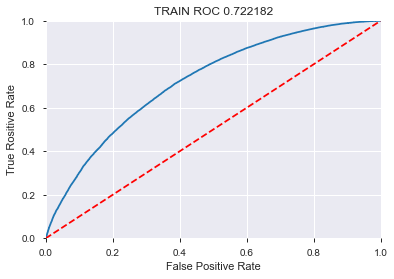

In [165]:
plot_roc_auc(y_train_undersampling, y_pred_train_proba_LR[:, 1], title='TRAIN')

In [166]:
# scaler test

In [167]:
X_test_scaled = X_test.copy(deep=True)
X_test_scaled[columns] = scaler.transform(X_test[columns])

In [168]:
print('-'*10, 'TEST', '-'*10)
print_metrics(y_test, model_LR.predict(X_test_scaled))

---------- TEST ----------
accuracy: 0.6921276778800654
MSE: 0.3078723221199346
MAE: 0.3078723221199346
f1 score: 0.5374114483685817
precision score: 0.47916090364223146
recall score: 0.6117847892630092


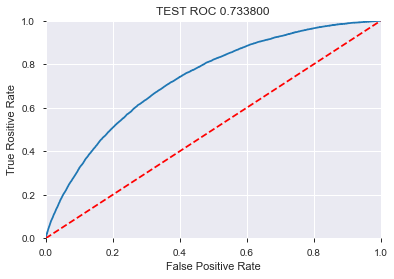

In [169]:
plot_roc_auc(y_test, model_LR.predict_proba(X_test_scaled)[:, 1], title='TEST')

In [182]:
featureImportance = feature_importance(X_train_undersampling.columns, model_LR.coef_[0])

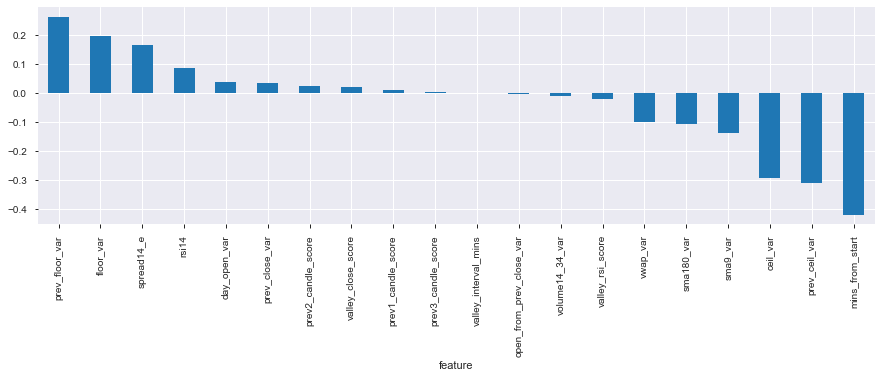

In [183]:
featureImportance.importance.plot(kind='bar', figsize=(15, 4));

### ---------- Random Forest ----------------------------

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
model_rf = RandomForestClassifier(n_estimators=1000, max_features=1, 
                                  bootstrap=True, 
                                  n_jobs=-1, random_state=42)

In [172]:
%%time
model_rf.fit(X_train, y_train)

CPU times: user 8min 45s, sys: 4.28 s, total: 8min 50s
Wall time: 1min 13s


RandomForestClassifier(max_features=1, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [173]:
y_pred_rf = model_rf.predict(X_train)
y_pred_prob_rf = model_rf.predict_proba(X_train)

In [174]:
print_metrics(y_train, y_pred_rf)

accuracy: 1.0
MSE: 0.0
MAE: 0.0
f1 score: 1.0
precision score: 1.0
recall score: 1.0


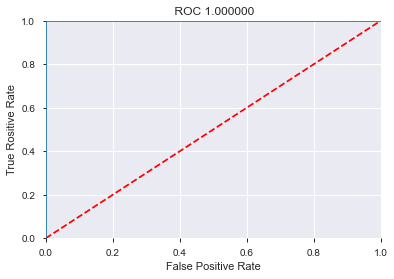

In [175]:
plot_roc_auc(y_train, y_pred_prob_rf[:, 1])

In [176]:
y_pred_test_rf = model_rf.predict(X_test)
y_pred_prob_test_rf = model_rf.predict_proba(X_test)

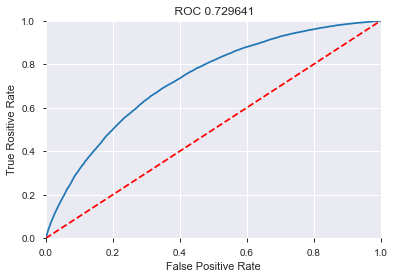

In [177]:
plot_roc_auc(y_test, y_pred_prob_test_rf[:, 1])

In [178]:
print_metrics(y_test, y_pred_test_rf)

accuracy: 0.7288307665834982
MSE: 0.2711692334165018
MAE: 0.2711692334165018
f1 score: 0.35779779127103795
precision score: 0.5813799496755396
recall score: 0.25841770661643515


In [179]:
featureImportance = feature_importance(X_train.columns, model_rf.feature_importances_)

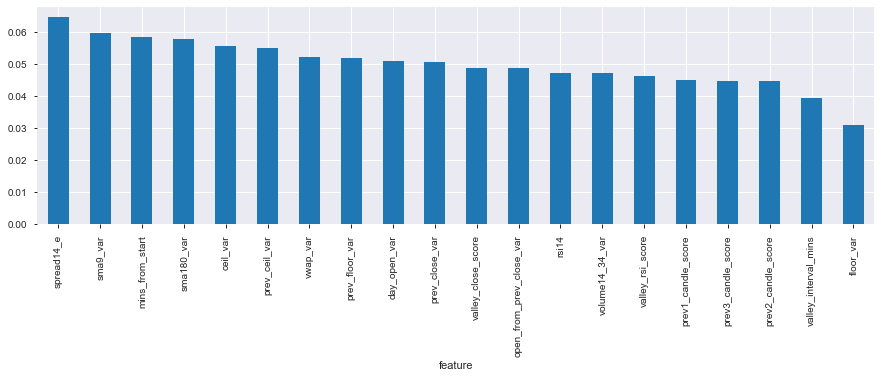

In [180]:
featureImportance.importance.plot(kind='bar', figsize=(15, 4));

### -------------SVC--------------------

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
from sklearn.svm import SVC

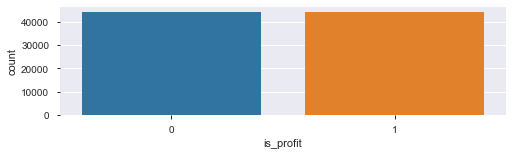

In [186]:
plt.figure(figsize=(8, 2))
sns.countplot(y_train_undersampling);

In [115]:
model_svc = SVC()

In [116]:
params_grid = {'kernel': ['linear', 'rbf']}

In [117]:
svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

In [118]:
%%time
model_svc.fit(X_train_svc, y_train_svc)

CPU times: user 2min 28s, sys: 84 ms, total: 2min 28s
Wall time: 2min 28s


SVC()

In [434]:
%%time
svr.fit(X_train_svc, y_train_svc)
#model_svc.fit(X_train, y_train)

CPU times: user 1min 7s, sys: 32 ms, total: 1min 7s
Wall time: 8min 8s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.01, 1.0, 10.0, 100.0]})

In [435]:
svr.best_params_

{'C': 1.0}

In [436]:
svr.best_params_

{'C': 1.0}

In [104]:
model_svc = SVC(kernel='rbf', random_state=42)

In [105]:
params_grid = {'C': [0.5, 2.0, 5.0]}

In [106]:
svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

In [107]:
%%time
svr.fit(X_train_svc, y_train_svc)

CPU times: user 20.3 s, sys: 136 ms, total: 20.4 s
Wall time: 1min 10s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.5, 2.0, 5.0]})

In [108]:
svr.best_params_

{'C': 0.5}

In [194]:
model_svc = SVC(kernel='rbf', C=1.0, random_state=42)

In [198]:
params_grid = {"gamma": [-100.0, -10.0, 1.0, 10.0, 100.0]}

In [199]:
svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

In [200]:
svr

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [-100.0, -10.0, 1.0, 10.0, 100.0]})

In [201]:
%%time
svr.fit(X_train_short, y_train_short)

CPU times: user 6min 50s, sys: 408 ms, total: 6min 50s
Wall time: 16min 30s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [-100.0, -10.0, 1.0, 10.0, 100.0]})

In [202]:
svr.best_params_

{'gamma': 10.0}

In [215]:
model_svc = SVC(kernel='rbf', C=1.0, random_state=42)

params_grid = {"gamma": [1.5, 2.0, 2.5, 3.0]}

svr = GridSearchCV(estimator=model_svc, param_grid=params_grid, cv=3, n_jobs=-1)

svr

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [1.5, 2.0, 2.5, 3.0]})

In [216]:
%%time
svr.fit(X_train_short, y_train_short)

CPU times: user 7min 11s, sys: 544 ms, total: 7min 11s
Wall time: 21min 28s


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [1.5, 2.0, 2.5, 3.0]})

In [217]:
svr.best_params_

{'gamma': 2.5}

#### model svc -> kerner = rbf , C = 1.0, gamma = 2.5

In [93]:
model_svc_final = SVC(kernel='rbf', C=1.0, gamma=2.5, probability=True)

In [ ]:
%%time
model_svc_final.fit(X_train, y_train)

In [ ]:
%%time
y_pred_train = model_svc_final.predict(X_train)

In [ ]:
print_metrics(y_train, y_pred_train)

In [ ]:
%%time
y_pred_test = model_svc_final.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred_test)

In [ ]:
%%time
plot_roc_auc(y_test, model_svc_final.predict_proba(X_test)[:, 1], title='TEST')

In [79]:
svr.best_params_

{'kernel': 'rbf'}

In [177]:
index = X_train.index

In [178]:
index_short = [i for i in index[::5]]

In [179]:
X_train_short = X_train.loc[index_short]

In [180]:
y_train_short = y_train[index_short]

In [84]:
params = {'C': [0.001, 0.1, 1, 10, 100]}

In [85]:
model_svc = SVC(kernel='rbf')

In [101]:
gsv = GridSearchCV(estimator=model_svc, param_grid=params, cv=3, n_jobs=-1)

In [87]:
%%time
gsv.fit(X_train_short, y_train_short)

CPU times: user 2min 27s, sys: 284 ms, total: 2min 28s
Wall time: 22min 45s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]})

In [115]:
y_train_short.shape, X_train_short.shape

((64682,), (64682, 24))

In [102]:
gsv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [94]:
model_svc = SVC(kernel='rbf', C=1.0)

In [87]:
params = {'gamma': [0.001, 0.1, 1, 10, 100, 1000]}

In [95]:
gsv = GridSearchCV(estimator=model_svc, param_grid=params, cv=3, n_jobs=-1)

In [97]:
%%time
model_svc.fit(X_train_short, y_train_short)

CPU times: user 3min 3s, sys: 128 ms, total: 3min 3s
Wall time: 3min 3s


SVC()

In [96]:
gsv

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.001, 0.1, 1, 10, 100, 1000]})

In [218]:
gsv.get_params_

AttributeError: 'GridSearchCV' object has no attribute 'get_params_'

In [ ]:
y_pred = model_svc.predict(X_train)

In [ ]:
print_metrics(y_train, y_pred)

In [7]:
a = np.c_[1:5]
b = np.c_[10:50:10]

In [9]:
np.c_[a, b].var()

189.6875

In [87]:
index_short_train = np.random.choice(index_train, 20000)

NameError: name 'index_train' is not defined

In [88]:
len(index_short_train)

20000

In [89]:
X_train_short = X_train.loc[index_short_train]

In [90]:
X_train_short.sort_index(inplace=True)

In [91]:
y_train_short = y_train.loc[index_short_train]

In [92]:
y_train_short.sort_index(inplace=True)

In [93]:
np.sum(y_train_short.index == X_train_short.index)

20000

In [94]:
sns.countplot(y_train_short)

In [132]:
model_svc = SVC()

In [130]:
%%time
model_svc.fit(X_train_short, y_train_short)

CPU times: user 29.4 s, sys: 96 ms, total: 29.5 s
Wall time: 29.5 s


SVC()

In [120]:
y_pred = model_svc.predict(X_test)

In [121]:
accuracy_score(y_test, y_pred)

0.36276919747074193

In [158]:
x = ds.sort_index().index
y = range(len(x))

In [159]:
plt.plot(x, y);

In [164]:
index_for_short = [v for v in x[::10]]
X_train_short = ds.loc[index_for_short]

In [165]:
X_train_short

is_profit   sym             datetime      rsi14  sma9_var  sma180_var  \
0            True  MGNX  2020-11-02 11:13:00  30.509761 -0.006223   -0.022679   
10           True  BLNK  2020-11-02 14:11:00  45.629119 -0.001515   -0.013328   
20          False  SMAR  2020-11-02 13:11:00  32.521222 -0.001613   -0.013340   
30           True    PS  2020-11-02 13:23:00  38.472459 -0.002767   -0.017476   
40           True  SHAK  2020-11-02 10:51:00  38.905403 -0.001339   -0.032060   
...           ...   ...                  ...        ...       ...         ...   
258680       True  FULT  2021-01-22 09:40:00  35.348826 -0.005714   -0.009876   
258690      False    JD  2021-01-22 13:29:00  31.379597 -0.000955   -0.004431   
258700      False  GOEV  2021-01-22 10:29:00  42.564584 -0.002300   -0.008094   
258710      False  PIPP  2021-01-22 11:28:00  40.807732 -0.002307   -0.009014   
258720       True  WOOF  2021-01-22 11:47:00  39.308846 -0.003392   -0.021485   

        vwap_var  spread14_e  volume14_34_var  prev_close_var  ...  \
0      -0.017526    0.000620        -0.006472       -0.037037  ...   
10     -0.015379    0.000450         0.276878        0.018084  ...   
20     -0.014689    0.000364        -0.076646       -0.014234  ...   
30     -0.016722    0.001334        -0.829735        0.007643  ...   
40     -0.011469    0.001067        -0.075535       -0.049576  ...   
...          ...         ...              ...             ...  ...   
258680 -0.003359    0.002311         0.046203       -0.003506  ...   
258690 -0.000979    0.000412         0.179564       -0.004731  ...   
258700 -0.002215    0.001492        -0.242891       -0.009947  ...   
258710 -0.010942    0.001348        -0.124533       -0.003864  ...   
258720 -0.013828    0.001880        -0.212968       -0.050841  ...   

        prev2_candle_score  prev3_candle_score  mins_from_start  \
0                 0.000000            0.000000            103.0   
10                0.000000           -0.001261            281.0   
20               -0.000102           -0.000305            221.0   
30                0.001899           -0.001577            233.0   
40                0.000000            0.000778             81.0   
...                    ...                 ...              ...   
258680           -0.001395            0.002098             10.0   
258690            0.000252            0.000211            239.0   
258700            0.002952           -0.000443             59.0   
258710           -0.001161            0.001301            118.0   
258720           -0.003259            0.000196            137.0   

        valley_interval_mins  valley_close_score  valley_rsi_score  \
0                       50.0            0.425532          0.758046   
10                      58.0            0.553183         15.230913   
20                      22.0            0.067683          2.201373   
30                      10.0            0.126266          6.540503   
40                       6.0            0.011531          2.949118   
...                      ...                 ...               ...   
258680                   9.0            0.070325         18.800343   
258690                  10.0            0.021018          4.763803   
258700                  10.0            0.052571          0.770240   
258710                  23.0            0.077514          6.924233   
258720                  10.0            0.083163          3.204049   

        day_open_var  open_from_prev_close_var  ceil_var  floor_var  
0          -0.032058                 -0.005144 -0.034554   0.000802  
10         -0.024661                  0.043825 -0.030637   0.003807  
20         -0.014827                  0.000601 -0.037581   0.000000  
30         -0.002207                  0.009873 -0.031231   0.004444  
40         -0.041485                 -0.008442 -0.041485   0.001914  
...              ...                       ...       ...        ...  
258680     -0.003506                  0.000000 -0.008374  

In [170]:
sns.boxplot(y='rsi14', x='is_profit', data=ds)

In [133]:
params_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1e0, 1e1, 1e2, 1e3],
              'gamma': np.logspace(-2, 2, 5)}

In [134]:
%%time
svr = GridSearchCV(model_svc, params_grid, cv=5, n_jobs=-1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 95.6 µs


In [135]:
%%time
svr.fit(X_train, y_train)

KeyboardInterrupt: 

In [136]:
svr.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_pred_train = svr.best_params(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)